In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from pandas_profiling import ProfileReport

# problem statement: Build a model which predict salary based on years of experience 

In [3]:
salary=pd.read_csv("D:\Dataset_3ri\Salary_Data.csv")

In [4]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
salary.shape

(30, 2)

In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

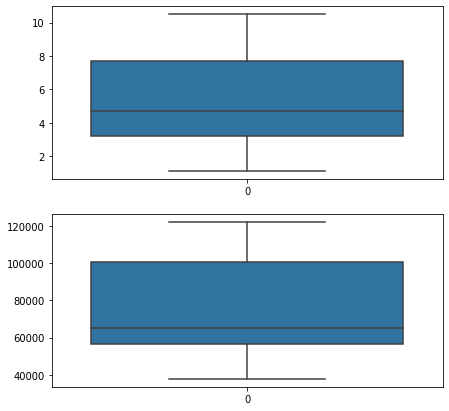

In [14]:
fig,axs=plt.subplots(2,figsize=(7,7))
plt1=sns.boxplot(salary['YearsExperience'],ax=axs[0])
plt2=sns.boxplot(salary['Salary'],ax=axs[1])

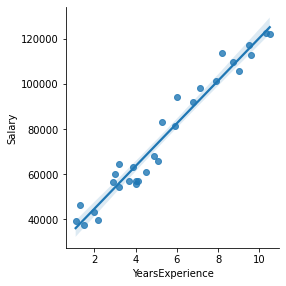

In [16]:
#need to check that how my sales are related with other variables.
sns.pairplot(salary, x_vars=['YearsExperience'],y_vars='Salary',height=4,aspect=1,kind='reg')
plt.show()

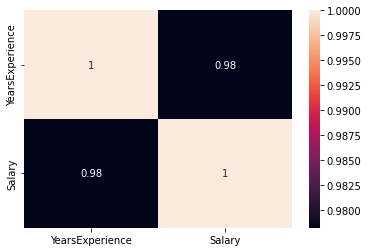

In [17]:
sns.heatmap(salary.corr(),annot=True)           
plt.show()


In [20]:
X = salary['YearsExperience']
y = salary['Salary']

In [47]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,train_size = 0.6 , random_state = 100)

In [48]:
import statsmodels.api as sm

In [49]:
X_train_sm=sm.tools.tools.add_constant(X_train)

In [50]:
lr=sm.OLS(y_train,X_train_sm).fit()

In [51]:
lr.params

const              25632.162897
YearsExperience     9673.996142
dtype: float64

In [52]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     322.6
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           4.99e-12
Time:                        20:49:10   Log-Likelihood:                -181.40
No. Observations:                  18   AIC:                             366.8
Df Residuals:                      16   BIC:                             368.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.563e+04   2951.877     

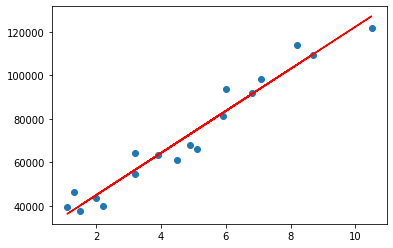

In [53]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 25632.162897+ 9673.996142*X_train,'r')
plt.show()